In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [2]:
# 구글드라이브 코랩 연동하는 코드
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


* 파일 읽어오기 / 필요한 데이터는 연도별 몇번 발생하는지
* 데이터 : https://www.weather.go.kr/w/eqk-vol/search/korea.do

In [3]:
import pandas as pd
df = pd.read_excel('/content/gdrive/MyDrive/지진희/1983_2023지진.xlsx', engine = 'openpyxl')
df.head()

,번호,발생시각,규모,깊이(km),최대,위도,경도,위치
0,NaN,NaT,NaN,NaN,진도,NaN,NaN,NaN
1,2134.0,2023-12-23 04:34:05,3.0,6,Ⅳ,35.80 N,127.53 E,전북 장수군 북쪽 17km 지역
2,2133.0,2023-12-11 01:23:25,2.3,12,Ⅰ,38.45 N,126.17 E,북한 황해북도 평산 북서쪽 24km 지역
3,2132.0,2023-12-08 06:31:18,2.5,-,Ⅲ,37.19 N,129.08 E,강원 삼척시 남남서쪽 30km 지역
4,2131.0,2023-12-06 19:11:06,2.0,28,Ⅰ,41.26 N,129.22 E,북한 함경북도 길주 북북서쪽 35km 지역


In [4]:
df.drop(0, axis = 0, inplace = True)
df.head(10)

,번호,발생시각,규모,깊이(km),최대,위도,경도,위치
1,2134.0,2023-12-23 04:34:05,3.0,6,Ⅳ,35.80 N,127.53 E,전북 장수군 북쪽 17km 지역
2,2133.0,2023-12-11 01:23:25,2.3,12,Ⅰ,38.45 N,126.17 E,북한 황해북도 평산 북서쪽 24km 지역
3,2132.0,2023-12-08 06:31:18,2.5,-,Ⅲ,37.19 N,129.08 E,강원 삼척시 남남서쪽 30km 지역
4,2131.0,2023-12-06 19:11:06,2.0,28,Ⅰ,41.26 N,129.22 E,북한 함경북도 길주 북북서쪽 35km 지역
5,2130.0,2023-12-05 05:53:41,2.2,19,Ⅰ,41.29 N,129.22 E,북한 함경북도 길주 북북서쪽 38km 지역
6,2129.0,2023-12-04 02:28:02,3.1,22,Ⅰ,41.30 N,129.15 E,북한 함경북도 길주 북북서쪽 41km 지역
7,2128.0,2023-11-30 04:55:24,4.0,12,Ⅴ,35.79 N,129.42 E,경북 경주시 동남동쪽 19km 지역
8,2127.0,2023-11-25 11:53:35,2.6,8,Ⅳ,36.69 N,126.83 E,충남 예산군 북서쪽 2km 지역
9,2126.0,2023-11-24 22:06:53,2.7,17,Ⅰ,35.07 N,125.06 E,전남 신안군 흑산도 북서쪽 55km 해역
10,2125.0,2023-11-23 21:31:58,2.2,18,Ⅰ,41.31 N,129.14 E,북한 함경북도 길주 북북서쪽 42km 지역


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 1 to 2134
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      2134 non-null   float64       
 1   발생시각    2134 non-null   datetime64[ns]
 2   규모      2134 non-null   float64       
 3   깊이(km)  1091 non-null   object        
 4   최대      453 non-null    object        
 5   위도      2134 non-null   object        
 6   경도      2134 non-null   object        
 7   위치      2134 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 133.5+ KB


In [6]:
df['YMD'] = df['발생시각'].dt.date
df['YMD'] = pd.to_datetime(df['YMD'], format='%Y-%m-%d', errors = 'raise')
df

,번호,발생시각,규모,깊이(km),최대,위도,경도,위치,YMD
1,2134.0,2023-12-23 04:34:05,3.0,6,Ⅳ,35.80 N,127.53 E,전북 장수군 북쪽 17km 지역,2023-12-23
2,2133.0,2023-12-11 01:23:25,2.3,12,Ⅰ,38.45 N,126.17 E,북한 황해북도 평산 북서쪽 24km 지역,2023-12-11
3,2132.0,2023-12-08 06:31:18,2.5,-,Ⅲ,37.19 N,129.08 E,강원 삼척시 남남서쪽 30km 지역,2023-12-08
4,2131.0,2023-12-06 19:11:06,2.0,28,Ⅰ,41.26 N,129.22 E,북한 함경북도 길주 북북서쪽 35km 지역,2023-12-06
5,2130.0,2023-12-05 05:53:41,2.2,19,Ⅰ,41.29 N,129.22 E,북한 함경북도 길주 북북서쪽 38km 지역,2023-12-05
...,...,...,...,...,...,...,...,...,...
2130,5.0,1983-02-28 16:36:52,2.6,NaN,NaN,37.70 N,126.10 E,인천 강화군 서쪽 35km 해역,1983-02-28
2131,4.0,1983-02-21 18:11:05,2.8,NaN,NaN,-,-,서울 북방 약 110km 지역,1983-02-21
2132,3.0,1983-02-11 04:53:20,2.6,NaN,NaN,38.60 N,126.50 E,북한 황해북도 신계 북북서쪽 12km 지역,1983-02-11
2133,2.0,1983-02-08 20:57:13,2.9,NaN,NaN,38.00 N,124.90 E,인천 백령도 동북동쪽 20km 해역,1983-02-08


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2134 entries, 1 to 2134
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   번호      2134 non-null   float64       
 1   발생시각    2134 non-null   datetime64[ns]
 2   규모      2134 non-null   float64       
 3   깊이(km)  1091 non-null   object        
 4   최대      453 non-null    object        
 5   위도      2134 non-null   object        
 6   경도      2134 non-null   object        
 7   위치      2134 non-null   object        
 8   YMD     2134 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(5)
memory usage: 150.2+ KB


In [8]:
df.set_index(df['YMD'], inplace=True)
df

,번호,발생시각,규모,깊이(km),최대,위도,경도,위치,YMD
YMD,,,,,,,,,
2023-12-23,2134.0,2023-12-23 04:34:05,3.0,6,Ⅳ,35.80 N,127.53 E,전북 장수군 북쪽 17km 지역,2023-12-23
2023-12-11,2133.0,2023-12-11 01:23:25,2.3,12,Ⅰ,38.45 N,126.17 E,북한 황해북도 평산 북서쪽 24km 지역,2023-12-11
2023-12-08,2132.0,2023-12-08 06:31:18,2.5,-,Ⅲ,37.19 N,129.08 E,강원 삼척시 남남서쪽 30km 지역,2023-12-08
2023-12-06,2131.0,2023-12-06 19:11:06,2.0,28,Ⅰ,41.26 N,129.22 E,북한 함경북도 길주 북북서쪽 35km 지역,2023-12-06
2023-12-05,2130.0,2023-12-05 05:53:41,2.2,19,Ⅰ,41.29 N,129.22 E,북한 함경북도 길주 북북서쪽 38km 지역,2023-12-05
...,...,...,...,...,...,...,...,...,...
1983-02-28,5.0,1983-02-28 16:36:52,2.6,NaN,NaN,37.70 N,126.10 E,인천 강화군 서쪽 35km 해역,1983-02-28
1983-02-21,4.0,1983-02-21 18:11:05,2.8,NaN,NaN,-,-,서울 북방 약 110km 지역,1983-02-21
1983-02-11,3.0,1983-02-11 04:53:20,2.6,NaN,NaN,38.60 N,126.50 E,북한 황해북도 신계 북북서쪽 12km 지역,1983-02-11


In [9]:
import numpy as np
df['cnt'] = 1
df1 = df.resample('M')['cnt'].agg(np.sum).fillna(0)
df1 # 월별 지진 발생 빈도

YMD
1983-01-31     1
1983-02-28     4
1983-03-31     1
1983-04-30     1
1983-05-31     1
              ..
2023-08-31     7
2023-09-30     9
2023-10-31    13
2023-11-30    11
2023-12-31     6
Freq: M, Name: cnt, Length: 492, dtype: int64

<Axes: xlabel='YMD'>

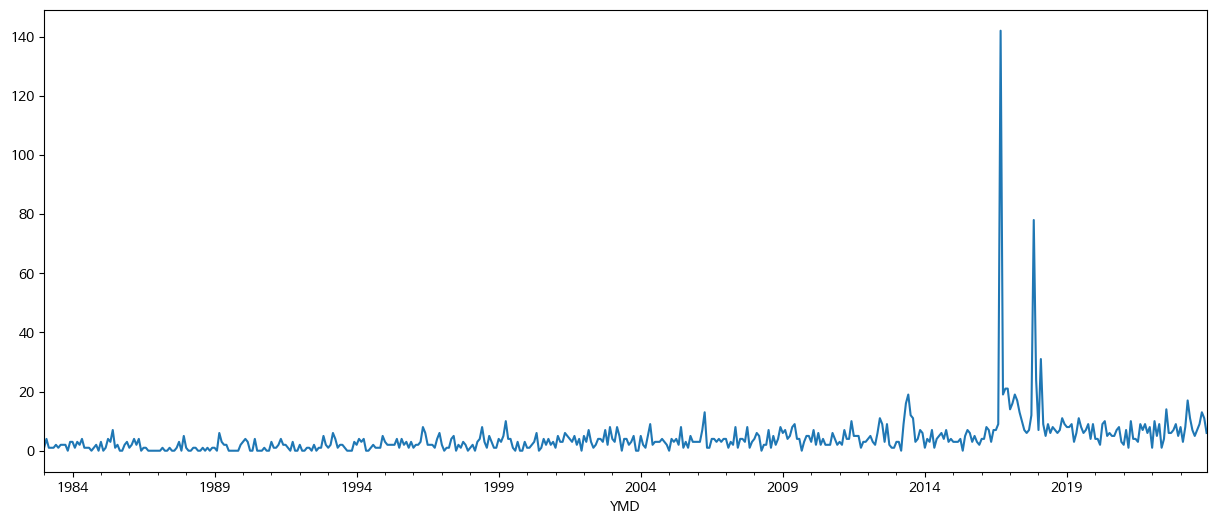

In [10]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

fig = plt.figure(figsize = (15,6))
df1.plot()

In [11]:
df2 = df1.to_frame().reset_index().rename(columns = {'YMD':'ds','cnt':'y'})
df2.head()

,ds,y
0,1983-01-31,1
1,1983-02-28,4
2,1983-03-31,1
3,1983-04-30,1
4,1983-05-31,1


In [12]:
df2.tail()

,ds,y
487,2023-08-31,7
488,2023-09-30,9
489,2023-10-31,13
490,2023-11-30,11
491,2023-12-31,6


In [13]:
# !pip install prophet

In [14]:
from prophet import Prophet
model = Prophet(holidays_prior_scale = 0.01)
model.fit(df2)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/l66xl5no.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/6o0fp175.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52327', 'data', 'file=/tmp/tmppt48zr60/l66xl5no.json', 'init=/tmp/tmppt48zr60/6o0fp175.json', 'output', 'file=/tmp/tmppt48zr60/prophet_model412ozvjo/prophet_model-20240124075044.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:50:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:50:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [15]:
dates = pd.DataFrame(pd.date_range('2024-1-1',periods=36,freq="M"), columns = ['ds']).astype('datetime64[ns]')
dates # 2024년 1월부터 36개월 예측

,ds
0,2024-01-31
1,2024-02-29
2,2024-03-31
3,2024-04-30
4,2024-05-31
5,2024-06-30
6,2024-07-31
7,2024-08-31
8,2024-09-30
9,2024-10-31


In [16]:
past = model.make_future_dataframe(periods=0, freq="M")
past

,ds
0,1983-01-31
1,1983-02-28
2,1983-03-31
3,1983-04-30
4,1983-05-31
...,...
487,2023-08-31
488,2023-09-30
489,2023-10-31
490,2023-11-30


In [17]:
future_data = pd.concat([past,dates], axis = 0)
future_data

,ds
0,1983-01-31
1,1983-02-28
2,1983-03-31
3,1983-04-30
4,1983-05-31
...,...
31,2026-08-31
32,2026-09-30
33,2026-10-31
34,2026-11-30


In [18]:
forecast = model.predict(future_data)
df_r = forecast[['ds','yhat']]
df_r

,ds,yhat
0,1983-01-31,-0.125224
1,1983-02-28,0.643027
2,1983-03-31,0.524993
3,1983-04-30,1.053280
4,1983-05-31,-0.598288
...,...,...
523,2026-08-31,10.068283
524,2026-09-30,11.244691
525,2026-10-31,11.026222
526,2026-11-30,11.039978


검은점 = 훈련데이터
파란선 = 예측값
희미한 범위 = 예측값의 하한값, 상한값
2024년부터가 예측이니까 2024년에 빨간줄을 그어놓을지?

<Figure size 1500x600 with 0 Axes>

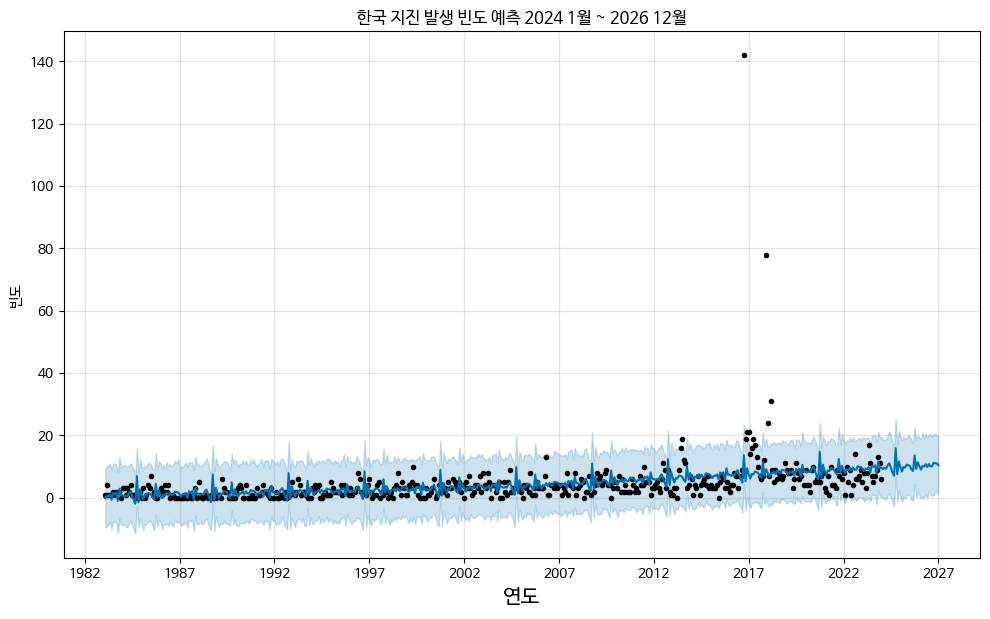

In [19]:
fig = plt.figure(figsize = (15,6))
ax = model.plot(forecast)
_=plt.xlabel('연도', fontsize = 15)
_=plt.ylabel('빈도')
_=plt.title('한국 지진 발생 빈도 예측 2024 1월 ~ 2026 12월')

In [20]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1983-01-31,1.348753,-9.600698,9.110558,1.348753,1.348753,-1.473977,-1.473977,-1.473977,-1.473977,-1.473977,-1.473977,0.0,0.0,0.0,-0.125224
1,1983-02-28,1.357972,-9.257927,10.175703,1.357972,1.357972,-0.714945,-0.714945,-0.714945,-0.714945,-0.714945,-0.714945,0.0,0.0,0.0,0.643027
2,1983-03-31,1.368178,-8.569092,10.352259,1.368178,1.368178,-0.843185,-0.843185,-0.843185,-0.843185,-0.843185,-0.843185,0.0,0.0,0.0,0.524993
3,1983-04-30,1.378055,-7.839267,10.919578,1.378055,1.378055,-0.324775,-0.324775,-0.324775,-0.324775,-0.324775,-0.324775,0.0,0.0,0.0,1.053280
4,1983-05-31,1.388262,-10.056845,8.658482,1.388262,1.388262,-1.986549,-1.986549,-1.986549,-1.986549,-1.986549,-1.986549,0.0,0.0,0.0,-0.598288


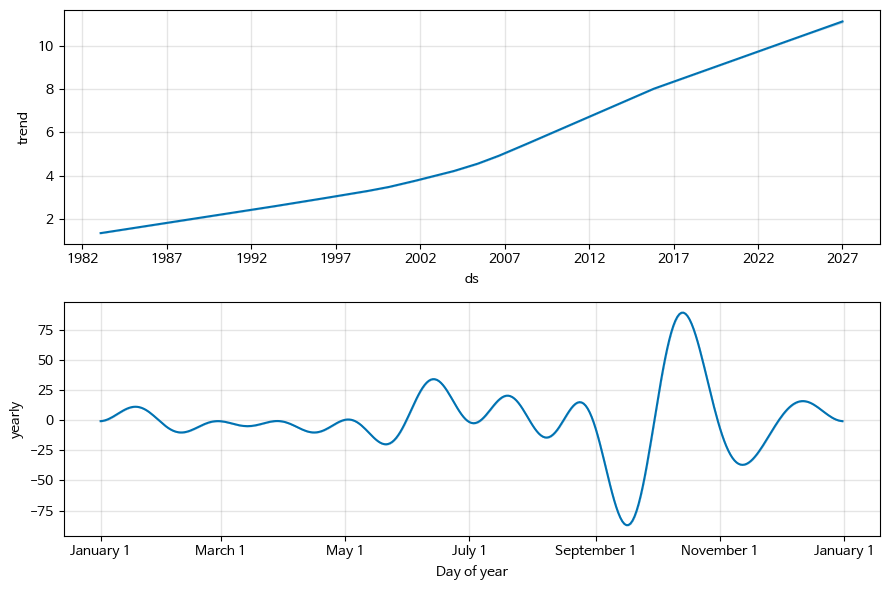

In [21]:
_=model.plot_components(forecast)

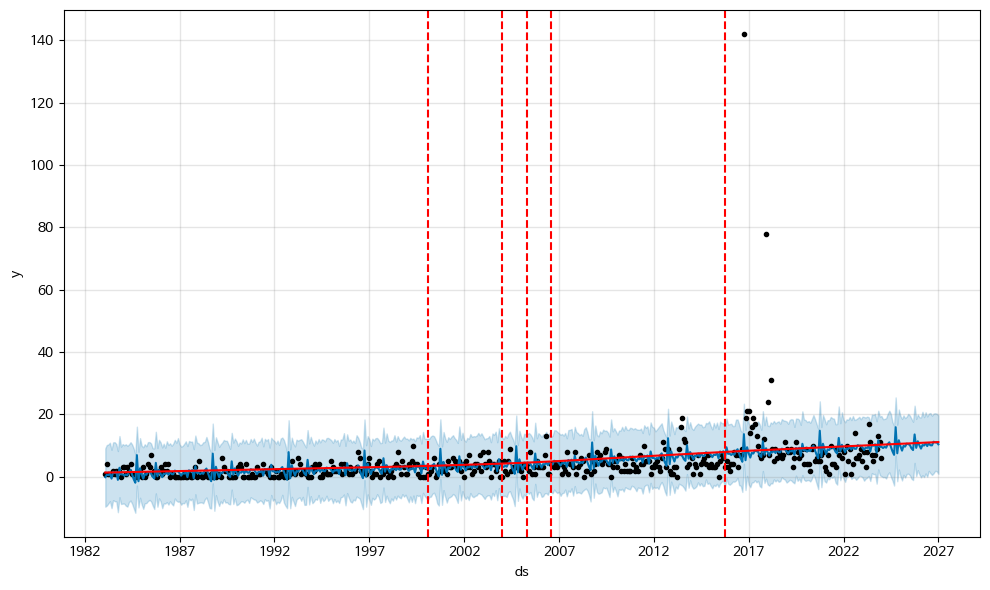

In [22]:
from prophet.plot import add_changepoints_to_plot
fig = model.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), model, forecast) # 점선 = changepoint, 실선 = 트렌드

## 그리드 서치로 최적의 하이퍼파라메터 찾기

In [23]:
search_space = {
 'changepoint_prior_scale': [0.05, 0.1, 0.5, 1.0, 5.0, 10.0],
 'seasonality_prior_scale': [0.05, 0.1, 1.0, 10.0],
 'seasonality_mode': ['additive', 'multiplicative']
}

## 돌릴때 주의 거의 30분 넘게 걸림

In [25]:
from prophet.diagnostics import cross_validation
import itertools
from prophet.diagnostics import performance_metrics

param_combined = [dict(zip(search_space.keys(), v)) for v in itertools.product(*search_space.values())]
rmse = []

for param in param_combined:
   print('params', param)
   m = Prophet(**param).fit(df2)
   cutoffs = pd.date_range(start='1993-01-01', end='2020-12-01', freq='2M')
   df_cv = cross_validation(m, horizon='90 days', cutoffs = cutoffs)
   df_p = performance_metrics(df_cv)
   rmse.append(df_p['rmse'].values[0])

tuning_results = pd.DataFrame(param_combined)
tuning_results['rmse'] = rmse
tuning_results.sort_values('rmse')
print(tuning_results)

Output hidden; open in https://colab.research.google.com to view.

In [29]:
tuning_results.sort_values('rmse')
print(tuning_results)
best_params = param_combined[np.argmin(rmse)]
print(best_params)

{'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 0.05, 'seasonality_mode': 'additive'}


In [30]:
model = Prophet(holidays_prior_scale = 0.01, changepoint_prior_scale = 0.05, seasonality_prior_scale = 0.05, seasonality_mode = 'additive')
model.fit(df2)
forecast_2 = model.predict(future_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/4zaw8e2v.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/rwtcng6i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27641', 'data', 'file=/tmp/tmppt48zr60/4zaw8e2v.json', 'init=/tmp/tmppt48zr60/rwtcng6i.json', 'output', 'file=/tmp/tmppt48zr60/prophet_model8hkqempk/prophet_model-20240124093755.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:37:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:37:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


<Figure size 1500x600 with 0 Axes>

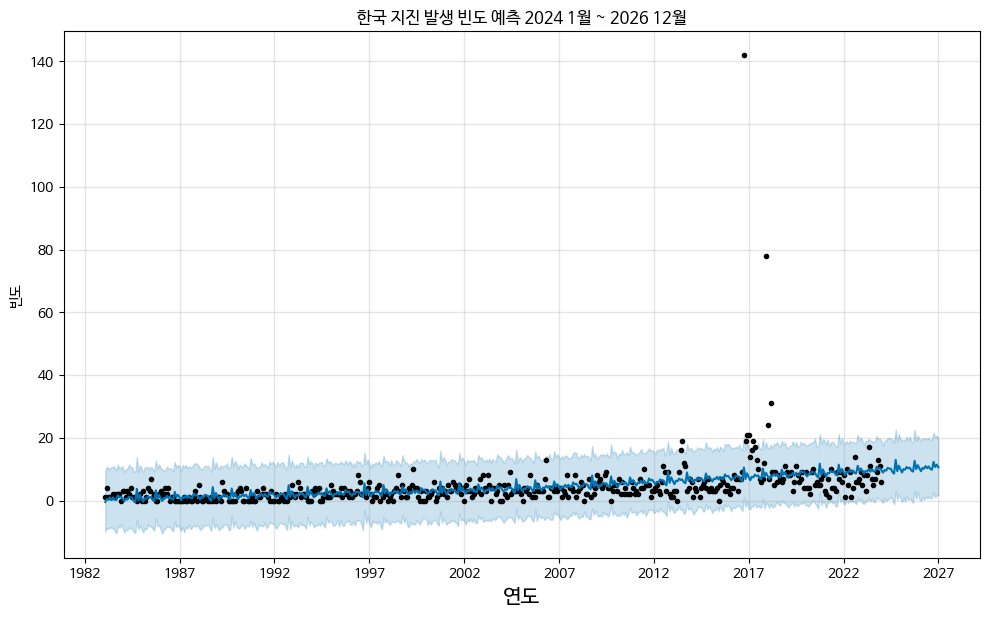

In [34]:
fig = plt.figure(figsize = (15,6))
ax = model.plot(forecast_2)
_=plt.xlabel('연도', fontsize = 15)
_=plt.ylabel('빈도')
_=plt.title('한국 지진 발생 빈도 예측 2024 1월 ~ 2026 12월')

## 교차검증 시각화

In [32]:
cutoffs = pd.date_range(start='1993-01-01', end='2020-12-01', freq='2M')
df_cv = cross_validation(model, horizon='90 days', cutoffs = cutoffs)

  0%|          | 0/168 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/bew5viad.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/tpxg44dw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62848', 'data', 'file=/tmp/tmppt48zr60/bew5viad.json', 'init=/tmp/tmppt48zr60/tpxg44dw.json', 'output', 'file=/tmp/tmppt48zr60/prophet_modelyy789z50/prophet_model-20240124093922.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:39:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:39:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/hhyf29ab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmppt48zr60/kev9vd8f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

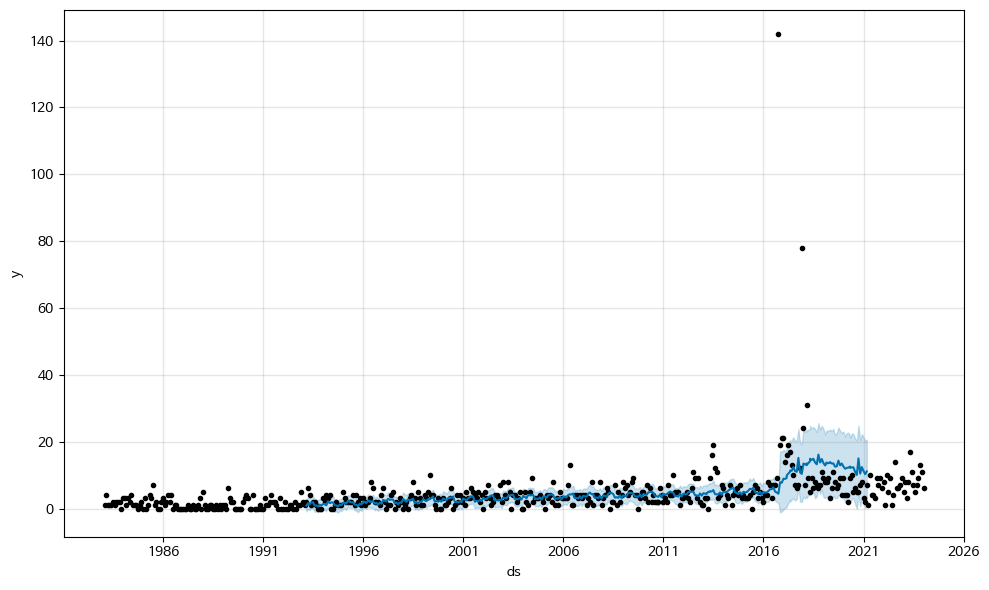

In [33]:
_=model.plot(df_cv)

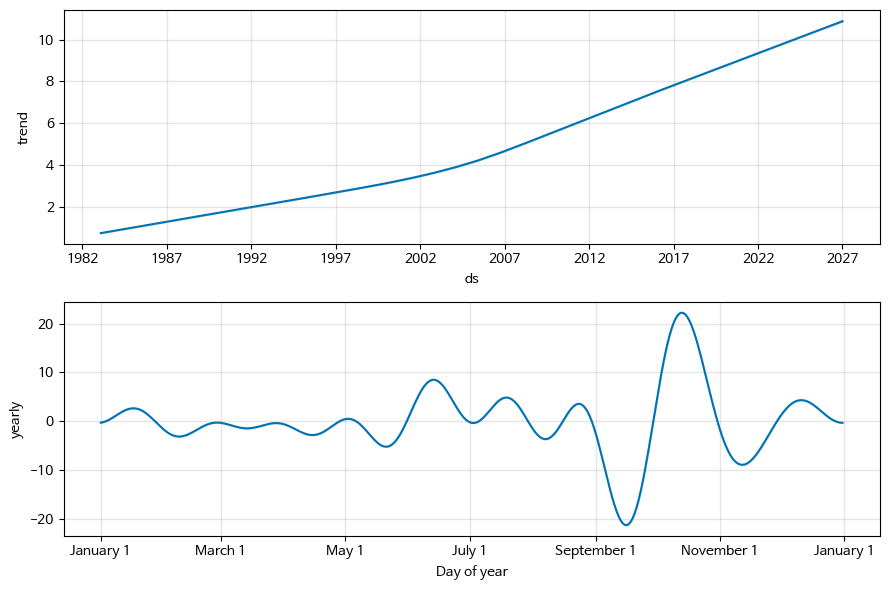

In [35]:
_=model.plot_components(forecast_2)